# K-Means Clustering


## Introdução


Esse é um dos mais simples e populares algoritmos de aprendizado não supervisionado.

O objetivo desse método é agrupar dados parecidos para observar padrões e para isso o algoritmo olha por k (pré definido) agrupamentos separados pela menor inércia (medida para o quão agrupado é o dataset) possível.

<img src='https://miro.medium.com/max/720/1*rw8IUza1dbffBhiA4i0GNQ.png' width=600>
<!--Imagem de  https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c-->

## Vantagens e desvantagens

### Vantagens
* Simples de implementar e interpretar
* Escalona bem para grandes conjuntos de dados
* Adapta facilmente a novos exemplos

### Desvantagens
* K deve ser escolhido manualmente
* Dificuldade de agrupar clusters de tamanhos e densidades diferentes
* Aleatoriedade na localização da inicialização dos clusters e ordem dos dados afetam o resultado final
* Menos eficiente para alta dimensionalidade

## Base matemática e algoritmo

O algoritmo K-means é um algoritmo simples de clusterização, sendo inicializado com um número K pré definido de clusters e a partir desse número, serão inicializados K centróides para esses clusters.

Há diferentes métodos para o cálculo da inicialização dos centróides, mas o método mais utilizado e também o que será explorado é chamado kmeans++.

Esse método funciona na seguinte ordem:
1. Arbitrariamente inicializa um centróide na posição de uma amostra dos nossos dados
2. Calcula a distância euclidiana entre as amostras restantes e o centróide
3. Escolhe outro ponto para ser a inicialização de um novo centróide com probabilidade proporcional à distância calculada no ponto 2 ao quadrado
4. Repete os passos 2 e 3 até atingir K centróides.

Escolhidos os pontos de inicialização, os exemplares restantes são atribuídos aos centróides mais próximos e ajustando a posição como uma média da posição de todas tuplas atribuídas aquele centróide.

### Número de clusters ideal

* Inércia

Verificar inércia (métrica de agrupamento) para diversos valores de clusters.

<img src='https://editor.analyticsvidhya.com/uploads/62725cluster0.PNG' width=400>

* Silhouette score: 

Métrica de coesão dos pontos de um cluster. Entre -1 (há muitos pontos sobrepondo) e 1 (divisão ideal sem overlapping).

<img src='https://editor.analyticsvidhya.com/uploads/90733cluster2.PNG'>

Pode ser calculado por: 

<img src='https://editor.analyticsvidhya.com/uploads/45590cluster1.PNG'>

E então escolhido o número de clusters com maior score.

<img src='https://editor.analyticsvidhya.com/uploads/45136cluster5.PNG' width=400>



## Aplicações

* Segmentação de imagens, cromossomos, clientes, etc
* Classificação de documentos
* Detecção de bots e fraudes

# Exemplo

Esse exemplo utiliza o conjunto de dados da flor Iris fornecido pelo scikit learn, contendo 150 exemplares de 3 espécies diferentes e 4 características: Sepal Length, Sepal Width, Petal Length and Petal Width.

### Visualização dos dados

Utilizando dados com uma baixa dimensionalidade para esse exemplo, é mais intuitivo visualizar como o K-means funcionará. 

A seguir é mostrado o pairplot desse dataset.

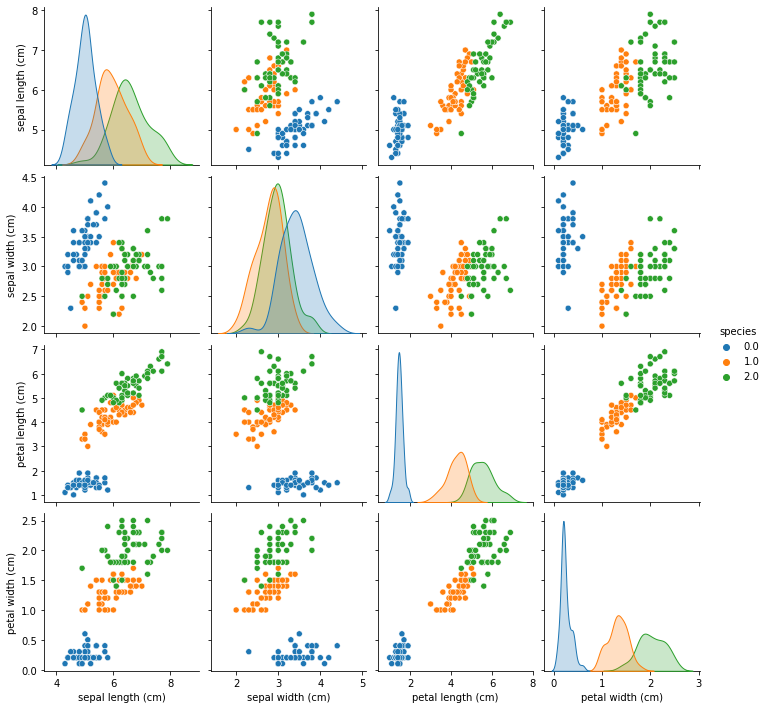

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = np.concatenate((iris.data, np.array([iris.target]).T), axis=1)
df = pd.DataFrame(X, columns=iris.feature_names + ['species'])

sns.pairplot(df, hue='species', palette='tab10')
plt.show()

### Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
x_treino, x_teste, y_treino, y_teste = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)
kmeans.fit(x_treino)

predicao = kmeans.predict(x_teste)

## Resultados

A seguir é plotado os resultados encontrados pelos K-means para visualizar como os clusters se comparam com os originais antes de visualizar as métricas.

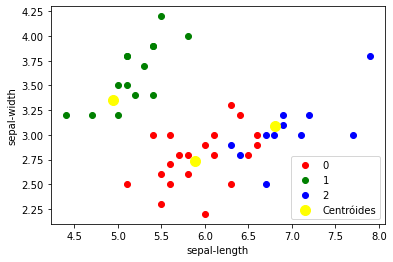

In [ ]:
# Clusters
plt.scatter(x_teste[predicao==0, 0], x_teste[predicao==0, 1], c='red', label='0')
plt.scatter(x_teste[predicao==1, 0], x_teste[predicao==1, 1], c='green', label='1')
plt.scatter(x_teste[predicao==2, 0], x_teste[predicao==2, 1], c='blue', label='2')

# Centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centróides')

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()

Olhando para o label dos dados reais, sabemos o que cada cluster significa

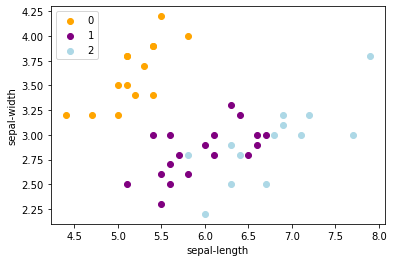

In [ ]:
plt.scatter(x_teste[y_teste==0, 0], x_teste[y_teste==0, 1], c='orange', label='0')
plt.scatter(x_teste[y_teste==1, 0], x_teste[y_teste==1, 1], c='purple', label='1')
plt.scatter(x_teste[y_teste==2, 0], x_teste[y_teste==2, 1], c='lightblue', label='2')

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend()

Após arrumar os labels podemos então comparar os resultados

In [ ]:
# Mudança em uma array requer um índice, então enumerate é usado
for i, y in enumerate(predicao):
  if y == 1:
    predicao[i] = 0
  elif y == 0:
    predicao[i] = 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      0.94      0.89        18
           2       0.91      0.77      0.83        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.91        45
weighted avg       0.91      0.91      0.91        45



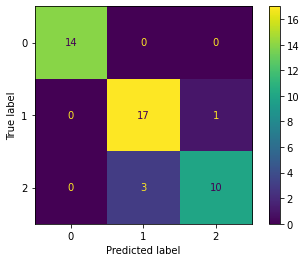

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_teste, predicao))
matriz_confusao = ConfusionMatrixDisplay.from_predictions(y_teste, predicao)
plt.show()

## Precisão

Porcentagem de todos os casos classificados corretamente

In [ ]:
from sklearn.metrics import accuracy_score

# Comparando com a classificação real
precisao = accuracy_score(y_teste, predicao)

print(f'Precisão: {100 * precisao:.1f}%')

Precisão: 91.1%


# Fontes bibliográficas

[1] Clustering. Sci-kit learn. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[2] Understanding K-means Clustering in Machine Learning
. Towardsdatascience. Disponível em: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

[3] Clustering. Google. Disponível em: https://developers.google.com/machine-learning/clustering

[4] David Arthur and Sergei Vassilvitskii. k-means++: The Advantages of Careful Seeding. Disponível em: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

[5] Muthukrishnan. Mathematics behind K-Mean Clustering algorithm. Disponível em: https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/

[6] K-Mean: Getting The Optimal Number Of Clusters
. Analytics Vydhya. Dispnível em: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/